# MySQL 데이터베이스

## MySQL 개발 환경 구축하기

In [ ]:
## 이번에는 DB에 데이터를 넣어보자!!!

In [ ]:
## 먼저 Ubuntu에 MySQL을 설치한다.
# 소프트웨어 패키지 업데이트
!sudo apt-get update

In [ ]:
# 설치
!sudo apt-get install mysql-server

In [ ]:
# 방화벽 해제
!sudo ufw allow mysql

In [ ]:
# MySQL 서비스 재시작(스펙이 떨어지는 경우 권장하지 않음)
!sudo systemctl enable mysql

In [1]:
# 파이썬 패키지 설치
!pip install pymysql

---

## 데이터베이스를 사용하기 위해 계정과 데이터베이스 생성

In [2]:
import pymysql

In [3]:
# MySQL 접속에 사용할 아이디와 비밀번호를 파일로 저장 및 관리하기 위한 파일이름과 경로를 담은 변수
MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

In [4]:
# Linux
# p 옵션은 디렉토리를 생성하기 위해 중간에 껴있는 디렉토리(여기서는 res)가 존재하지 않을 시, 자동으로 생성할 목적으로 사용했다.
!mkdir -p res/mysql/

# Windows
#!mkdir res\mysql

In [5]:
# 디렉토리가 생성되었는지 확인
!ls

python_snippets.ipynb  res


In [ ]:
# mysql 계정을 만들어야함

# 다음은 계정과 데이터베이스를 생성하는 절차이다. 터미널에서 진행하면 된다

# sudo mysql -u root -p
# create schema `pydb` default character set utf8;
# create user eddi@localhost identified by 'eddi@123';
# grant all privileges on pydb.* to eddi@localhost;
# flush privileges;

- pickle: 파이썬에서 사용하는 딕셔너리, 리스트, 클래스 등의 자료형을 변환 없이 그대로 파일로 저장하고 이를 불러올 때 사용하는 모듈
- pickle.dump 메소드: 객체를 파일에 저장하는 함수

In [6]:
import pickle

mysql_user_info = dict({
    'user_id': 'eddi',
    'password': 'eddi@123'
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close() # 파일을 열었으면 닫아주어야 한다

# 삭제하기 전에 확인
print(mysql_user_info)

# 파일을 저장하였으므로 del 키워드를 사용하여 객체를 삭제
del mysql_user_info

{'user_id': 'eddi', 'password': 'eddi@123'}


In [7]:
# 객체 삭제 후 확인
print(mysql_user_info)

NameError: name 'mysql_user_info' is not defined

In [8]:
# 파일이 저장되었는지 확인
!ls res/mysql

userinfo


In [9]:
# 저장된 파일로부터 내용을 읽어오는 작업
import pickle

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb') # read binary
mysql_user_info = pickle.load(f)
f.close()

In [10]:
# 파일을 제대로 읽어왔는지 확인
print(mysql_user_info)

{'user_id': 'eddi', 'password': 'eddi@123'}


In [ ]:
# 전용 스키마를 생성해야 한다.
# create schema `pydb` default character set utf8mb4;
# grant all privileges on pydb.* to eddi@localhost;
# flush privileges;

바로 위에 있는 Cell은 실행시키지 않았다

In [11]:
# DB 연결
# pymysql.connect() 메소드를 사용하여 MySQL에 연결
# 아래의 코드는 pydb라는 저장소를 사용하겠다는 코드
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트 번호
    port = 3306,
    # 아이디
    user = mysql_user_info['user_id'],
    # 비번
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'
)

print(db)

In [12]:
# 이제 DB에서 select 등을 수행했을때
# 나오는 결과를 순회할 수 있도록 지원하는 객체를 가져온다.
cursor = db.cursor()

print(cursor)

In [13]:
# MySQL 수동 쿼리를 적용하여 table을 생성해보도록 한다.
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
# I/O는 무겁기 때문에 별도로 commit이 존재함
db.commit()

# 작업 완료 이후 DB 연결을 끊는다.
db.close()

print("테이블 생성 성공!")

테이블 생성 성공!


In [14]:
# 바로 위에서 생성한 테이블에 값을 넣는 코드이다.
# insert 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

# 아래 코드에서 id 값이 없는 이유는 auto_increment인 자동 증가가 있어서, 우리가 입력하지 않아도 알아서 들어간다.
sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 34000000))
cursor.execute(sql, ('GPU Server', 20000000))
cursor.execute(sql, ('RTX 3090', 4000000))

db.commit()

db.close()

print("테이블에 값 넣기 성공!")

테이블에 값 넣기 성공!


In [15]:
# select(값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
# 객체에 저장!
rows = cursor.fetchall()
print(rows)

db.close()

print("데이터 불러오기 성공!")

((1, 'Xeon Server', 10000000), (2, 'FPGA Server', 34000000), (3, 'GPU Server', 20000000), (4, 'RTX 3090', 4000000))
데이터 불러오기 성공!


In [16]:
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print(row)

db.close()

print("데이터 낱개로 불러오기 성공!")

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 34000000)
(3, 'GPU Server', 20000000)
(4, 'RTX 3090', 4000000)
데이터 낱개로 불러오기 성공!


In [17]:
# 낱개 내에서 각각의 데이터를 얻기(딕셔너리 형식이라 키값으로 뽑으면 됨)
# select(값 가져오기) 낱개로 가져오기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

# 낱개로 가져올 때 사용
cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다.
rows = cursor.fetchall()

for row in rows:
    print('id: ', row['id'], ', name: ', row['name'], ', price: ', row['price'])

db.close()

print("데이터 낱개로 불러와 특정값 추출하기 성공!")

id:  1 , name:  Xeon Server , price:  10000000
id:  2 , name:  FPGA Server , price:  34000000
id:  3 , name:  GPU Server , price:  20000000
id:  4 , name:  RTX 3090 , price:  4000000
데이터 낱개로 불러와 특정값 추출하기 성공!


In [18]:
# 입력한 데이터값 정리하기(테이블 삭제)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()
db.close()

print("테이블 삭제 성공!")

테이블 삭제 성공!


In [19]:
import pickle
import pymysql

MYSQL_USER_DATA_SAVED_FILE = "res/mysql/userinfo"

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [20]:
# 소수점 데이터 처리하기!
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()
db.close()

print("float 형식의 테이블 생성 성공!")

float 형식의 테이블 생성 성공!


In [21]:
import time
import math
import calendar
import datetime
import numpy as np

In [22]:
# 0부터 10초까지의 시간을 0.001 단위로 자름
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [23]:
print(sample_time.size)

10000


In [24]:
# 가우시안 분포(정규 분포) 형식을 따르는 랜덤을 만듦
# 용어 필요 없고 데이터 개수에 따른 랜덤을 적절하게 만들어줌(자연스럽게)
noise = np.random.normal(size = len(sample_time))

print(noise)

[ 0.10608     1.2149614  -0.11481048 ...  0.02284635 -1.13848181
 -0.7816518 ]


In [25]:
# 전압ㆍ전류 신호를 간단하게 만드는 코드이다.
# 2 * pi * f = w = 5 ===> f = 5 / (2 * pi)
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[3.10608    4.2149239  2.88503953 ... 2.90561234 1.74840042 2.10927449]
[ 2.70415621  3.81752591  2.49221892 ... -1.08358516 -2.23654281
 -1.87133242]


In [26]:
# 시각화 라이브러리 설치
!pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

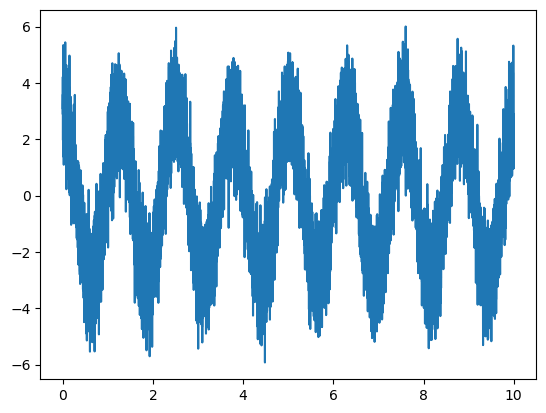

In [28]:
# 아래 plot 함수의 첫 번째와 두 번째 인자는 각각 x 좌표와 y 좌표이다.
plt.plot(sample_time, voltage)
plt.show()

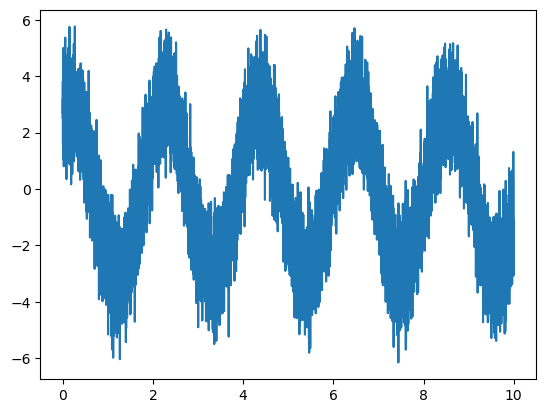

In [29]:
plt.plot(sample_time, current)
plt.show()

In [30]:
# 현재 시간값을 컴퓨터가 계산하고 있는 수치로 가져옴
# timestamp 값을 가져온다
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개짜리 배열이므로
# 곱셈을 수행할 경우 알아서 1000개 배열에 1000씩 곱해짐(자동으로)
# 샘플 타임이 0.001초(1 / 1000 초)를 대상으로 하고 있음
# 전체 샘플 타임의 개수는 10000개(만개)이므로 1 / 1000 초 단위 샘플링을 하면
# 10000 / 1000 = 10초간의 데이터를 수집함을 의미함
ts = (sample_time * 1000) + ts # 테이블에 값을 저장하기 위해 시간 데이터를 만들었다고 생각하면 된다

print(ts)

1673880580
[1.67388058e+09 1.67388058e+09 1.67388058e+09 ... 1.67389058e+09
 1.67389058e+09 1.67389058e+09]


In [31]:
# 실제 db에 넣기 위해 상호간의 데이터 타입을 np.float32로 맞춰줌(이것을 해줘야 DB에 입력 가능함)
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

In [32]:
curr_time = []

# datetime.datetime을 통해 시간값을 제어할 수 있으며
# datetime.datetime.fromtimestamp(컴퓨터시간).strftime(형식)을 통해
# 원하는 형태로 시간을 형 변환할 수 있음
for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2023-01-16 23:49:40', '2023-01-16 23:49:41', '2023-01-16 23:49:42', '2023-01-16 23:49:43', '2023-01-16 23:49:44', '2023-01-16 23:49:45', '2023-01-16 23:49:46', '2023-01-16 23:49:47', '2023-01-16 23:49:48', '2023-01-16 23:49:49', '2023-01-16 23:49:50', '2023-01-16 23:49:51', '2023-01-16 23:49:52', '2023-01-16 23:49:53', '2023-01-16 23:49:54', '2023-01-16 23:49:55', '2023-01-16 23:49:56', '2023-01-16 23:49:57', '2023-01-16 23:49:58', '2023-01-16 23:49:59', '2023-01-16 23:50:00', '2023-01-16 23:50:01', '2023-01-16 23:50:02', '2023-01-16 23:50:03', '2023-01-16 23:50:04', '2023-01-16 23:50:05', '2023-01-16 23:50:06', '2023-01-16 23:50:07', '2023-01-16 23:50:08', '2023-01-16 23:50:09', '2023-01-16 23:50:10', '2023-01-16 23:50:11', '2023-01-16 23:50:12', '2023-01-16 23:50:13', '2023-01-16 23:50:14', '2023-01-16 23:50:15', '2023-01-16 23:50:16', '2023-01-16 23:50:17', '2023-01-16 23:50:18', '2023-01-16 23:50:19', '2023-01-16 23:50:20', '2023-01-16 23:50:21', '2023-01-16 23:50:22', '2023-01-1

In [33]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

# 소수점 형식의 데이터와 현재 시간값을 기록하도록 한다.
sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values(
        %s, %s, %s, %s, %s
    )
"""

# volt, curr이 np.float32
# DB에 넣는 과정은 %s(문자열) 형식이므로 반드시 str()로 한 번 감싸줘야함
try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'EDDI',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
            
        db.commit()
finally:
    db.close()
    
print('소수점 형식 데이터 및 날짜 형식 데이터 입력 완료!')

소수점 형식 데이터 및 날짜 형식 데이터 입력 완료!
